### Export data to google colab

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
print(tf.__version__)

2.15.0


In [2]:
file = ('/content/drive/MyDrive/Data_Samples/Wine_Data/winequality-red.csv')

red_wine_raw = pd.read_csv(file)
red_wine_raw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
file = ('/content/drive/MyDrive/Data_Samples/Wine_Data/winequality-white.xlsx')

white_wine_raw = pd.read_excel(file)
white_wine_raw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Red Wine prediction model

### Prepping data for model fitting

In [4]:
red_wine_raw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
red_wine_raw = red_wine_raw.dropna()

In [6]:
red_wine_raw.isna().sum() # Check for any nan values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
# Making features and labels
red_wine_labels = red_wine_raw["quality"]
red_wine_labels

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [8]:
red_wine_features = red_wine_raw.drop("quality", axis = 1)
red_wine_features

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [9]:
from sklearn.model_selection import train_test_split
# Creating Training and testing data
red_wine_train_labels, red_wine_test_labels, red_wine_train_features, red_wine_test_features = train_test_split(red_wine_labels, red_wine_features, test_size = 0.2, random_state = 0)

len(red_wine_raw), len(red_wine_test_labels), len(red_wine_train_labels), len(red_wine_test_features), len(red_wine_train_features)

(1599, 320, 1279, 320, 1279)

In [10]:
tf.shape(red_wine_raw)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1599,   12], dtype=int32)>

### Visualize data
- See what data we are working with


Text(0, 0.5, 'Frequency')

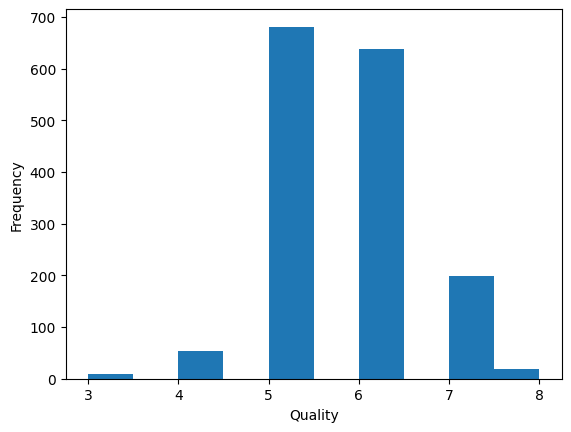

In [11]:
plt.hist(red_wine_labels)
plt.xlabel("Quality")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

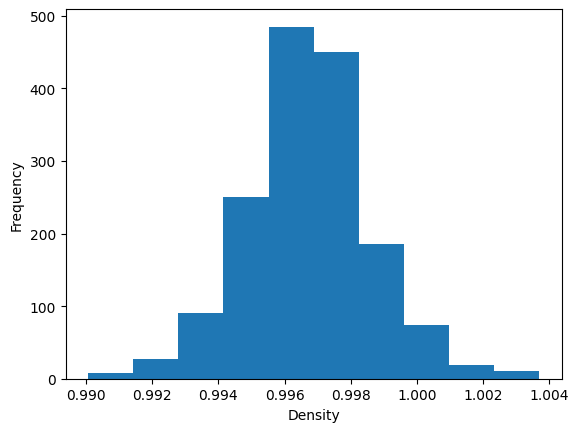

In [12]:
plt.hist(red_wine_features["density"])
plt.xlabel("Density")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

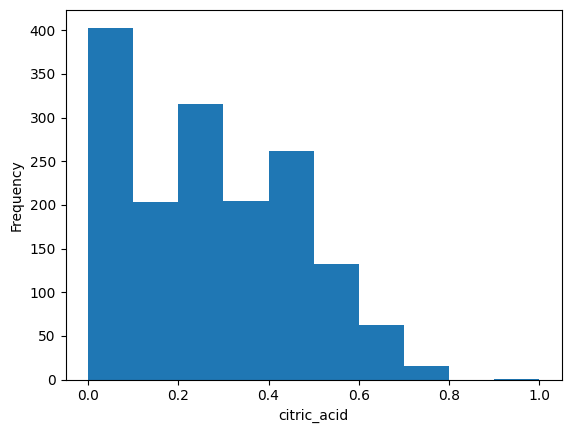

In [13]:
plt.hist(red_wine_features["citric acid"])
plt.xlabel("citric_acid")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

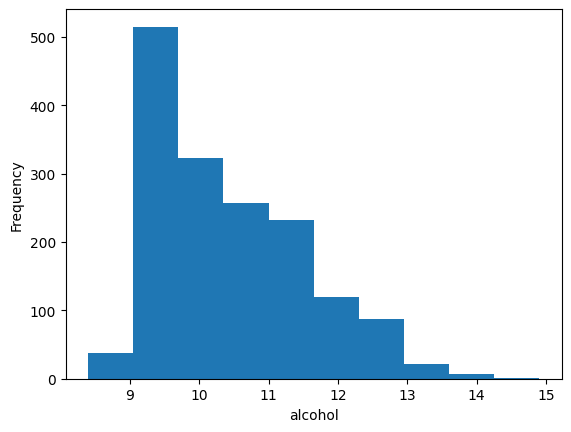

In [14]:
plt.hist(red_wine_features["alcohol"])
plt.xlabel("alcohol")
plt.ylabel("Frequency")

- Since this is a real data set of actual wine much of the data is heavily skewed towards just a few general values.
- To combat this, normalization and standarization are essential for making the most accurate model possible.

### Normalizing training and testing data


In [15]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()

scaler.fit(red_wine_features)
red_wine_train_features = scaler.transform(red_wine_train_features)
red_wine_test_features = scaler.transform(red_wine_test_features)

In [16]:
red_wine_train_features

array([[0.46902655, 0.28767123, 0.45      , ..., 0.51181102, 0.17365269,
        0.15384615],
       [0.54867257, 0.09589041, 0.45      , ..., 0.30708661, 0.1257485 ,
        0.18461538],
       [0.46902655, 0.15753425, 0.55      , ..., 0.40944882, 0.2754491 ,
        0.33846154],
       ...,
       [0.2920354 , 0.30821918, 0.31      , ..., 0.43307087, 0.21556886,
        0.16923077],
       [0.74336283, 0.23972603, 0.49      , ..., 0.44094488, 0.20958084,
        0.66153846],
       [0.46017699, 0.5890411 , 0.32      , ..., 0.4015748 , 0.08982036,
        0.15384615]])

In [17]:
red_wine_test_features

array([[0.54867257, 0.23972603, 0.43      , ..., 0.33858268, 0.25748503,
        0.36923077],
       [0.30973451, 0.47945205, 0.        , ..., 0.48818898, 0.11976048,
        0.18461538],
       [0.39823009, 0.11643836, 0.33      , ..., 0.40944882, 0.30538922,
        0.50769231],
       ...,
       [0.39823009, 0.15068493, 0.42      , ..., 0.34645669, 0.13173653,
        0.46153846],
       [0.39823009, 0.44178082, 0.04      , ..., 0.43307087, 0.1257485 ,
        0.2       ],
       [0.31858407, 0.1369863 , 0.42      , ..., 0.41732283, 0.13173653,
        0.6       ]])

### Training models on the data

In [18]:
tf.random.set_seed(0)

red_wine_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

red_wine_model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = tf.keras.metrics.mse)

red_wine_result = red_wine_model_1.fit(red_wine_train_features, red_wine_train_labels, epochs = 100)

Epoch 1/100
40/40 [==============================] - 2s 5ms/step - loss: 1.0058 - mean_squared_error: 2.0844
Epoch 2/100
40/40 [==============================] - 0s 6ms/step - loss: 0.6237 - mean_squared_error: 0.6528
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 0.5771 - mean_squared_error: 0.5590
Epoch 4/100
40/40 [==============================] - 0s 5ms/step - loss: 0.5619 - mean_squared_error: 0.5377
Epoch 5/100
40/40 [==============================] - 0s 11ms/step - loss: 0.5901 - mean_squared_error: 0.5731
Epoch 6/100
40/40 [==============================] - 0s 8ms/step - loss: 0.5964 - mean_squared_error: 0.5907
Epoch 7/100
40/40 [==============================] - 0s 9ms/step - loss: 0.5649 - mean_squared_error: 0.5214
Epoch 8/100
40/40 [==============================] - 0s 8ms/step - loss: 0.5662 - mean_squared_error: 0.5279
Epoch 9/100
40/40 [==============================] - 0s 7ms/step - loss: 0.5790 - mean_squared_error: 0.5518
Epoch 10/100
40/40

In [19]:
red_wine_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                600       
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10801 (42.19 KB)
Trainable params: 10801 (42.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


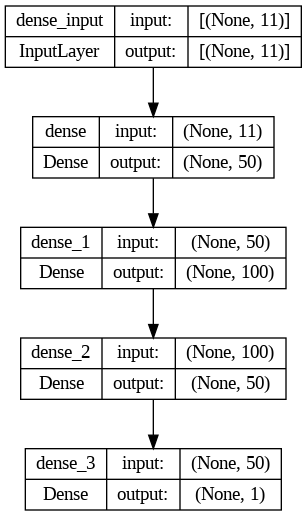

In [20]:
plot_model(red_wine_model_1, show_shapes = True)

In [21]:
red_wine_model_1.evaluate(red_wine_test_features, red_wine_test_labels)

10/10 [==============================] - 0s 2ms/step - loss: 0.4979 - mean_squared_error: 0.4283


[0.4978576600551605, 0.4282914996147156]

In [22]:
red_wine_model_1.predict(red_wine_test_features[:5])

1/1 [==============================] - 0s 89ms/step


array([[5.925715 ],
       [5.1332464],
       [6.8117247],
       [5.387227 ],
       [6.1176696]], dtype=float32)

Text(0.5, 0, 'Epochs')

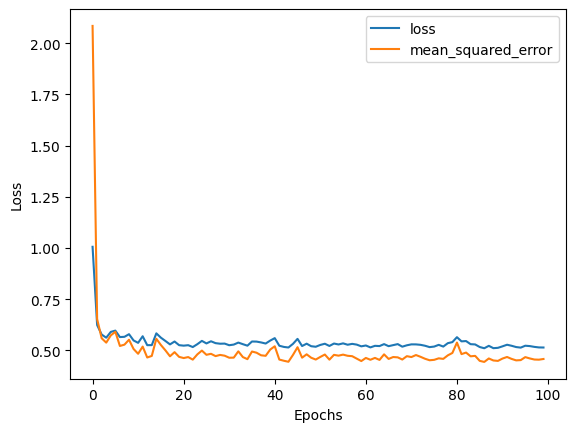

In [23]:
pd.DataFrame(red_wine_result.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

In [24]:
# Model 1 is already pretty accurate
# However, lets try improving the model

red_wine_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

red_wine_model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = tf.keras.losses.mse)

red_wine_model_2.fit(red_wine_train_features, red_wine_train_labels, epochs = 100)

Epoch 1/100
40/40 [==============================] - 1s 3ms/step - loss: 2.9461 - mean_squared_error: 12.4770
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 0.8299 - mean_squared_error: 1.0916
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6782 - mean_squared_error: 0.7621
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6360 - mean_squared_error: 0.6748
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6001 - mean_squared_error: 0.6140
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5836 - mean_squared_error: 0.5762
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5613 - mean_squared_error: 0.5315
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5548 - mean_squared_error: 0.5242
Epoch 9/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5341 - mean_squared_error: 0.4866
Epoch 10/100
40/40

In [25]:
red_wine_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                600       
                                                                 
 dense_5 (Dense)             (None, 100)               5100      
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 50)                5050      
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 20901 (81.64 KB)
Trainable params: 20901 (81.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


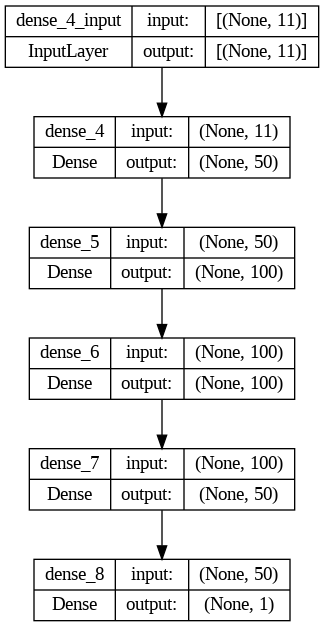

In [26]:
plot_model(red_wine_model_2, show_shapes = True)

In [27]:
model_1_loss = red_wine_model_1.evaluate(red_wine_test_features, red_wine_test_labels)[0]
model_2_loss = red_wine_model_2.evaluate(red_wine_test_features, red_wine_test_labels)[0]

abs(model_1_loss - model_2_loss) # About 2% difference model_2 is slightly better

10/10 [==============================] - 0s 3ms/step - loss: 0.4685 - mean_squared_error: 0.4092


0.029388219118118286

## White wine prediction model

Since both data sets are similar we can go straight to setting up, normalizing and fitting the data

In [28]:
white_wine_raw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [29]:
white_wine_raw = white_wine_raw.dropna()

In [30]:
white_wine_raw.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [31]:
white_wine_labels = white_wine_raw["quality"]
white_wine_features = white_wine_raw.drop("quality", axis = 1)

In [32]:
# Training and testing data split
white_wine_train_labels, white_wine_test_labels, white_wine_train_features, white_wine_test_features = train_test_split(white_wine_labels, white_wine_features, test_size = 0.2, random_state = 0)

In [33]:
len(white_wine_test_features), len(white_wine_test_labels), len(white_wine_train_features), len(white_wine_train_labels)

(980, 980, 3918, 3918)

In [34]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()

scaler.fit(white_wine_features)
white_wine_train_features = scaler.transform(white_wine_train_features)
white_wine_test_features = scaler.transform(white_wine_test_features)

In [35]:
white_wine_train_features[0:5]

array([[0.32692308, 0.17647059, 0.19277108, 0.15030675, 0.15727003,
        0.07317073, 0.24361949, 0.18295739, 0.46363636, 0.31395349,
        0.40322581],
       [0.15384615, 0.20588235, 0.22891566, 0.00920245, 0.05934718,
        0.1010453 , 0.28538283, 0.0354733 , 0.50909091, 0.1627907 ,
        0.70967742],
       [0.25961538, 0.37254902, 0.18674699, 0.06748466, 0.05341246,
        0.04529617, 0.14617169, 0.08752651, 0.49090909, 0.44186047,
        0.56451613],
       [0.27884615, 0.25490196, 0.18072289, 0.23006135, 0.13353116,
        0.17073171, 0.43387471, 0.21380374, 0.42727273, 0.31395349,
        0.20967742],
       [0.22115385, 0.07843137, 0.1626506 , 0.18404908, 0.16320475,
        0.21254355, 0.3549884 , 0.2369385 , 0.85454545, 0.24418605,
        0.14516129]])

In [36]:
white_wine_test_features[0:5]

array([[0.33653846, 0.23529412, 0.21084337, 0.01226994, 0.12166172,
        0.02090592, 0.35730858, 0.10275689, 0.47272727, 0.23255814,
        0.43548387],
       [0.30769231, 0.2254902 , 0.15662651, 0.10429448, 0.17804154,
        0.09059233, 0.35034803, 0.15982263, 0.37272727, 0.27906977,
        0.29032258],
       [0.36538462, 0.05882353, 0.44578313, 0.01533742, 0.09198813,
        0.08710801, 0.21809745, 0.08656256, 0.31818182, 0.20930233,
        0.4516129 ],
       [0.11538462, 0.20588235, 0.3253012 , 0.07822086, 0.07715134,
        0.18118467, 0.3387471 , 0.05108926, 0.5       , 0.13953488,
        0.79032258],
       [0.21153846, 0.19607843, 0.13253012, 0.17714724, 0.115727  ,
        0.13937282, 0.35730858, 0.16560632, 0.43636364, 0.27906977,
        0.33870968]])

In [37]:
# We can go ahead to use model_2 as the data structure for both datasets is the same
white_wine_model = tf.keras.models.clone_model(red_wine_model_2)
white_wine_model.compile(loss = tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                         metrics = tf.keras.losses.mse)
white_wine_result = white_wine_model.fit(white_wine_train_features, white_wine_train_labels, epochs = 100, verbose = 0)

In [38]:
white_wine_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                600       
                                                                 
 dense_5 (Dense)             (None, 100)               5100      
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 50)                5050      
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 20901 (81.64 KB)
Trainable params: 20901 (81.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
white_wine_model.evaluate(white_wine_test_features, white_wine_test_labels)

31/31 [==============================] - 0s 3ms/step - loss: 0.5928 - mean_squared_error: 0.6707


[0.5927932262420654, 0.6706559062004089]

Text(0.5, 0, 'Epochs')

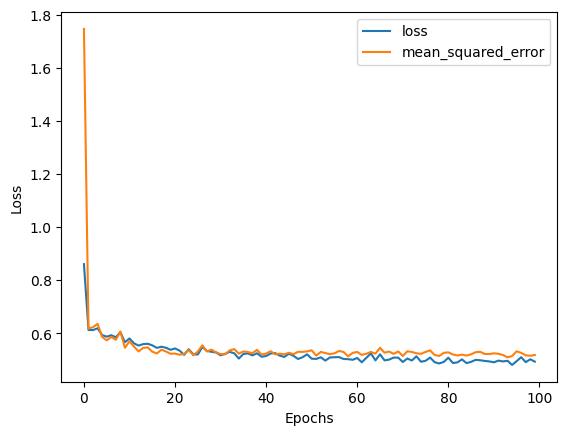

In [40]:
pd.DataFrame(white_wine_result.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

In [41]:
white_wine_model.predict(white_wine_test_features[0:5])

1/1 [==============================] - 0s 99ms/step


array([[5.891701 ],
       [5.872827 ],
       [5.957037 ],
       [6.8835006],
       [5.9298015]], dtype=float32)

## Final Anaylsis

In [50]:
# Saving model using saved model format
red_wine_model_2.save("Red-Wine-Quality-Prediction-Model")
white_wine_model.save("White-Wine-Quality-Prediction-Model")

In [44]:
!ls Red-Wine-Quality-Prediction-Model

assets	fingerprint.pb	keras_metadata.pb  saved_model.pb  variables


In [45]:
!ls White-Wine-Quality-Prediction-Model

assets	fingerprint.pb	keras_metadata.pb  saved_model.pb  variables


In [51]:
# Load a model from the SavedModel format
red_wine_loaded_model = tf.keras.models.load_model("Red-Wine-Quality-Prediction-Model")
red_wine_loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                600       
                                                                 
 dense_5 (Dense)             (None, 100)               5100      
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 50)                5050      
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 20901 (81.64 KB)
Trainable params: 20901 (81.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
white_wine_loaded_model = tf.keras.models.load_model("White-Wine-Quality-Prediction-Model")
white_wine_loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                600       
                                                                 
 dense_5 (Dense)             (None, 100)               5100      
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 50)                5050      
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 20901 (81.64 KB)
Trainable params: 20901 (81.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
red_wine_loaded_model.evaluate(red_wine_test_features, red_wine_test_labels)

10/10 [==============================] - 0s 2ms/step - loss: 0.4685 - mean_squared_error: 0.4092


[0.46846944093704224, 0.4091518819332123]

In [49]:
white_wine_loaded_model.evaluate(white_wine_test_features, white_wine_test_labels)

31/31 [==============================] - 0s 2ms/step - loss: 0.5928 - mean_squared_error: 0.6707


[0.5927932262420654, 0.6706559062004089]